# Advanced Usage
In this tutorial we will continue from the job created in the Basic Tutorial,
and demonstrate some more advanced functionality that DFControl offers.

To load a previously saved job we here provide a valid job directory with a job.sh script
in it.

In [1]:
using DFControl

tjob = load(Job(joinpath(splitdir(pathof(DFControl))[1], "..", "docs","src","assets", "job")))#hide
tjob2 = load(Job(joinpath(splitdir(pathof(DFControl))[1], "..", "docs","src","assets", "Job2")))#hide
if false#hide
job = load(Servers.local_server(), Job("job"))
else#hide
    global job = deepcopy(tjob)#hide
    job.dir= "job" #hide
    job#hide
end#hide

+--------------JOB------------+
| name:     Si                  |
| dir:      job                 |
| version:  0                   |
| server:   fv-az238-733, alive |
| versions: 0                   |
| state:    Unknown             |
+-------------------------------+
(scheduled, not scheduled)
	scf
	bands


Since the job created in the Basic Tutorial was saved in the "job" directory this will work, see the section on Jobs for
further details and options on how to load previously saved jobs.

The next thing we may want to do is to change the directory where the job is running.

In [2]:
if false#hide
job.dir = "Job2"
else#hide
    global job = deepcopy(tjob2)#hide
    pop!(job)#hide
    pop!(job)#hide
    job#hide
end#hide

+--------------------------------------------JOB------------------------------------------+
| name:            Si                                                                       |
| dir:             /home/runner/work/DFControl.jl/DFControl.jl/src/../docs/src/assets/Job2  |
| version:         0                                                                        |
| server:          fv-az238-733, alive                                                      |
| versions:        0                                                                        |
| last submission: 2022-09-06T21:51:58                                                      |
| state:           Unknown                                                                  |
+-------------------------------------------------------------------------------------------+
(scheduled, not scheduled)
	scf
	bands


With the `copy=true` flag we let DFControl know that not only to create and set the
new directory, but also to copy the previous results and temporary files to the
new directory so we don't have to rerun the scf calculation.

Next we would like to plot the projected density of states.
For that we create both an nscf calculation to get a uniform k-grid, and projwfc calculation.

In [3]:
push!(job, Calculations.gencalc_nscf(job["scf"], (6, 6, 6)))

┌ Info: 
│ name = nscf
│ infile = nscf.in
└ outfile = nscf.out


3-element Vector{Calculation}:
 Calculation{QE}:
name  = scf
exec = pw.x
run   = false
data  = [:k_points]
flags:
  &control
    calculation => scf

  &system
    ecutwfc => 20.0

  &electrons
    conv_thr => 1.0e-6


 Calculation{QE}:
name  = bands
exec = pw.x
run   = true
data  = [:k_points]
flags:
  &control
    verbosity   => high
    calculation => bands

  &system
    ecutwfc => 20.0

  &electrons
    conv_thr => 1.0e-6


 Calculation{QE}:
name  = nscf
exec = pw.x
run   = false
data  = [:k_points]
flags:
  &control
    verbosity   => high
    calculation => nscf

  &system
    ecutwfc => 20.0

  &electrons
    conv_thr => 1.0e-6



The second argument of gencalc_nscf is the kgrid. When passing a 3-Tuple,
the code will assume that an explicit k-grid is requested, which can be verified by

In [4]:
data(job["nscf"], :k_points)

Block name: k_points
Block option: crystal
Block data:

[(0.0, 0.0, 0.0, 0.004629629629629629), (0.16666666666666666, 0.0, 0.0, 0.004629629629629629), (0.3333333333333333, 0.0, 0.0, 0.004629629629629629), (0.5, 0.0, 0.0, 0.004629629629629629), (0.6666666666666666, 0.0, 0.0, 0.004629629629629629), (0.8333333333333334, 0.0, 0.0, 0.004629629629629629), (0.0, 0.16666666666666666, 0.0, 0.004629629629629629), (0.16666666666666666, 0.16666666666666666, 0.0, 0.004629629629629629), (0.3333333333333333, 0.16666666666666666, 0.0, 0.004629629629629629), (0.5, 0.16666666666666666, 0.0, 0.004629629629629629), (0.6666666666666666, 0.16666666666666666, 0.0, 0.004629629629629629), (0.8333333333333334, 0.16666666666666666, 0.0, 0.004629629629629629), (0.0, 0.3333333333333333, 0.0, 0.004629629629629629), (0.16666666666666666, 0.3333333333333333, 0.0, 0.004629629629629629), (0.3333333333333333, 0.3333333333333333, 0.0, 0.004629629629629629), (0.5, 0.3333333333333333, 0.0, 0.004629629629629629), (0.6666666

Next we generate a projwfc calculation using the fermi level as a guide for the
energy window.
The arguments are structured as (template, Emin, Emax, deltaE) respectively.

In [5]:
fermi = readfermi(job)
push!(job, Calculations.gencalc_projwfc(job["nscf"], fermi - 10, fermi + 1, 0.1))

┌ Info: 
│ name = projwfc
│ infile = projwfc.in
└ outfile = projwfc.out


4-element Vector{Calculation}:
 Calculation{QE}:
name  = scf
exec = pw.x
run   = false
data  = [:k_points]
flags:
  &control
    calculation => scf

  &system
    ecutwfc => 20.0

  &electrons
    conv_thr => 1.0e-6


 Calculation{QE}:
name  = bands
exec = pw.x
run   = true
data  = [:k_points]
flags:
  &control
    verbosity   => high
    calculation => bands

  &system
    ecutwfc => 20.0

  &electrons
    conv_thr => 1.0e-6


 Calculation{QE}:
name  = nscf
exec = pw.x
run   = false
data  = [:k_points]
flags:
  &control
    verbosity   => high
    calculation => nscf

  &system
    ecutwfc => 20.0

  &electrons
    conv_thr => 1.0e-6


 Calculation{QE}:
name  = projwfc
exec = projwfc.x
run   = false
data  = Symbol[]
flags:
  &projwfc
    Emin    => -3.9729
    Emax    => 7.0271
    DeltaE  => 0.1
    ngauss  => 0
    degauss => 0.0



Next we disable the bands calculation and run the new ones.

In [6]:
job["bands"].run = false
if false#hide
    submit(job)
else#hide
    global job = deepcopy(tjob2)#hide
end#hide

+--------------------------------------------JOB------------------------------------------+
| name:            Si                                                                       |
| dir:             /home/runner/work/DFControl.jl/DFControl.jl/src/../docs/src/assets/Job2  |
| version:         0                                                                        |
| server:          fv-az238-733, alive                                                      |
| versions:        0                                                                        |
| last submission: 2022-09-06T21:51:58                                                      |
| state:           Unknown                                                                  |
+-------------------------------------------------------------------------------------------+
(scheduled, not scheduled)
	scf
	bands
	nscf
	projwfc


## Plot Results

┌ Info: Found 2 atomic orbitals that satisfy the minimum occupation:
└ Tuple{Symbol, DFControl.Structures.Orbital}[(:Si, DFControl.Structures.Orbital("s", 1, 0, 1)), (:Si, DFControl.Structures.Orbital("p", 3, 1, 0))]
[ Info: Reading pdos files and generating band coloring...
[ Info: Plotting bands...


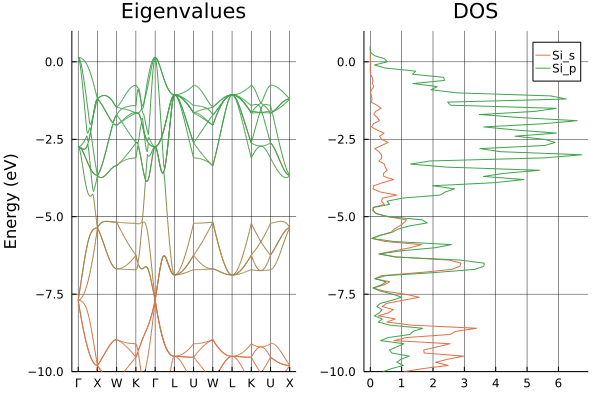

In [7]:
using Plots
plot(job, -10, 1)

As we can see, again DFControl identifies the additional information that is now present in the job, and uses it
to display in the plot.

In the demonstrated case we see that everything went according to plan, however, often things need to be changed
in a trial and error way until the desired results are found.

On common occurence is that calculation flags have to be set, or changed. This can be done in two ways

In [8]:
job[:ecutwfc] = 40.0

┌ Info: scf: -> ecutwfc:
└       20.0 set to: 40.0
┌ Info: bands: -> ecutwfc:
└       20.0 set to: 40.0
┌ Info: nscf: -> ecutwfc:
└       20.0 set to: 40.0
┌ Warning: ecutwfc could not be found in allowed flags,
│ please set it manually using <c>.flags[ecutwfc] = 40.0
└ @ DFControl.Calculations ~/work/DFControl.jl/DFControl.jl/src/Calculations/calculation.jl:311


40.0

will go through all the calculations of the job and set the flag if it is allowed, i.e. the flag will not
be set in the projwfc calculation since it makes no sense.

In [9]:
job["bands"][:nbnd] = 30

┌ Info: bands: -> nbnd:
└        set to: 30


30

This will set a flag for one specific calculation, again checking whether the flag is valid, and the type
will be converted to the correct one.

In order to quickly specify what calculations to schedule and which not, one can use

In [10]:
Jobs.set_flow!(job, "" => false, "scf" => true)

+--------------------------------------------JOB------------------------------------------+
| name:            Si                                                                       |
| dir:             /home/runner/work/DFControl.jl/DFControl.jl/src/../docs/src/assets/Job2  |
| version:         0                                                                        |
| server:          fv-az238-733, alive                                                      |
| versions:        0                                                                        |
| last submission: 2022-09-06T21:51:58                                                      |
| state:           Unknown                                                                  |
+-------------------------------------------------------------------------------------------+
(scheduled, not scheduled)
	scf
	bands
	nscf
	projwfc


As we can see, only the scf and nscf calculations are scheduled to run now,
this is because for each of the pairs in the arguments of `set_flow!`, every calculation inside
the job for which the string occurs in the name will be set to run or not depending on the Bool.